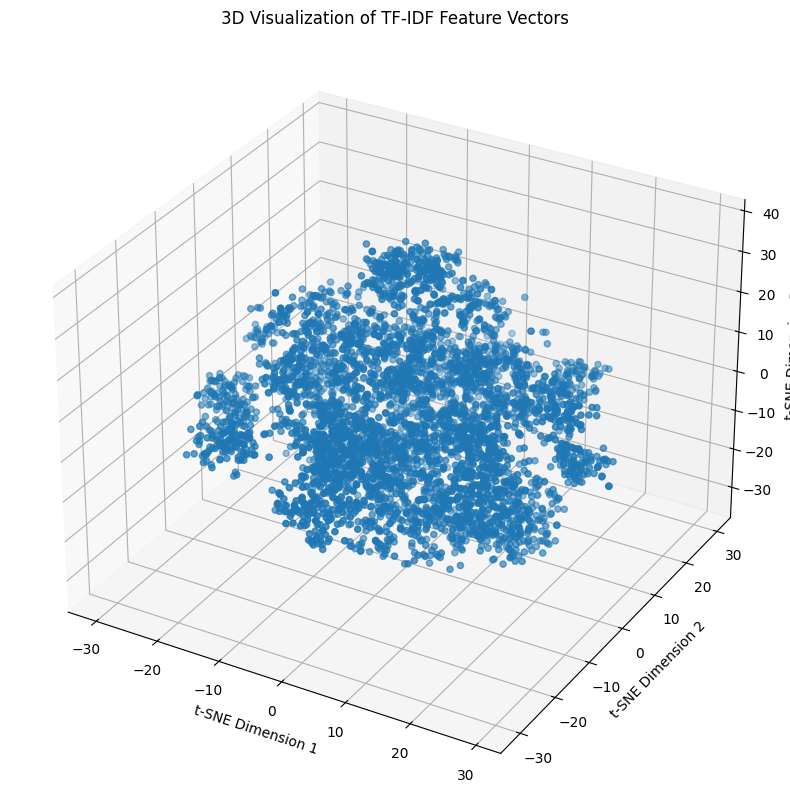

In [2]:
!pip install matplotlib
import pandas as pd
import numpy as np
import pickle
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Contains functions to visualize various data components that are generated in the data processing sequence
def graph_tfidf():
    #CREATES 3D VISUALIZATION OF TF-IDF MATRIX VALUES
    #Load TF-IDF matrix and vectorizer
    with open("tfidf_matrix.pkl", "rb") as f:
        tfidf_matrix = pickle.load(f)
        
    # Load TF-IDF vectors
    vector_data = tfidf_matrix.toarray()
    
    # Reduce to 3D using t-SNE
    tsne = TSNE(n_components=3, random_state=42)
    reduced_vectors = tsne.fit_transform(vector_data)
    
    # Plot 3D Graph
    fig = plt.figure(figsize=(16, 14))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2])
    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.set_zlabel("t-SNE Dimension 3")
    ax.set_title("3D Visualization of TF-IDF Feature Vectors")
    
    plt.show()

def graph_word_embedding():
    #CREATES 2D VISUALIZATION OF WORD2VEC MATRIX VALUES
    #Load Word2Vec model
    word2vec_model = gensim.models.Word2Vec.load("patterns_word2vec.model")
    
    #Load pattern dataset
    df_patterns = pd.read_csv("patterns_with_vectors.csv")
    
    #Convert vectors into NumPy arrays
    df_patterns["vector_representation"] = df_patterns["vector_representation"].apply(lambda vec: np.fromstring(vec, sep = ","))
    
    #Place vectors into matrix
    vector_data = np.vstack(df_patterns["vector_representation"].values)
    
    #Reduce dimensions to 2D using t-SNE
    tsne = TSNE(n_components = 2, random_state = 42)
    reduced_vectors = tsne.fit_transform(vector_data)
    
    #Plot 2D Graph
    plt.figure(figsize = (10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha = 0.7)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("2D Visualization of Pattern Dataset Word Embeddings (Word2Vec)")
    plt.show()

def graph_2d_hybrid_cosine():
    #CREATES 2D VISUALIZATION FOR HYBRID COSINE SIMILARITY MATRIX
    # Load Hybrid Similarity Matrix
    cosine_sim_hybrid = pd.read_csv("patterns_cosim_hybrid.csv", index_col=0)
    
    # Ensure indices are integers
    cosine_sim_hybrid.index = cosine_sim_hybrid.index.astype(int)
    cosine_sim_hybrid.columns = cosine_sim_hybrid.columns.astype(int)
    
    # Ensure similarity values are between 0 and 1
    cosine_sim_hybrid = (cosine_sim_hybrid - cosine_sim_hybrid.min()) / (cosine_sim_hybrid.max() - cosine_sim_hybrid.min())
    
    # Compute the mask for filtering out low-similarity patterns
    min_sim_threshold = 0.1
    mask = cosine_sim_hybrid.max(axis=1) > min_sim_threshold
    
    # Apply the mask to keep only the high-similarity patterns
    filtered_sim_matrix = cosine_sim_hybrid.loc[mask, mask]
    
    # Convert similarity to distance
    distance_matrix = 1 - filtered_sim_matrix
    
    # Ensure the distance matrix has no negative values
    distance_matrix[distance_matrix < 0] = 0  
    
    # Reduce dimensions using t-SNE
    tsne = TSNE(n_components=2, random_state=42, metric="precomputed", init="random")
    reduced_vectors = tsne.fit_transform(distance_matrix)
    
    # Plot 2D Graph
    plt.figure(figsize=(10, 7))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("2D Visualization of Filtered Hybrid Cosine Similarity (TF-IDF and Word2Vec)")
    plt.show()

def graph_3d_hybrid_cosine():
    #CREATES 3D VISUALIZATION OF HYBRID COSINE SIMILARITY MATRIX
    # Load Hybrid Similarity Matrix
    cosine_sim_hybrid = pd.read_csv("patterns_cosim_hybrid.csv", index_col=0)
    
    # Ensure indices are integers
    cosine_sim_hybrid.index = cosine_sim_hybrid.index.astype(int)
    cosine_sim_hybrid.columns = cosine_sim_hybrid.columns.astype(int)
    
    # Ensure similarity values are between 0 and 1
    cosine_sim_hybrid = (cosine_sim_hybrid - cosine_sim_hybrid.min()) / (cosine_sim_hybrid.max() - cosine_sim_hybrid.min())
    
    # Compute the mask for filtering out low-similarity patterns
    min_sim_threshold = 0.1
    mask = cosine_sim_hybrid.max(axis=1) > min_sim_threshold
    
    # Apply the mask to keep only the high-similarity patterns
    filtered_sim_matrix = cosine_sim_hybrid.loc[mask, mask]
    
    # Convert similarity to distance
    distance_matrix = 1 - filtered_sim_matrix
    
    # Ensure the distance matrix has no negative values
    distance_matrix[distance_matrix < 0] = 0  
    
    # Reduce to 3D using t-SNE
    tsne_3d = TSNE(n_components=3, random_state=42, metric="precomputed", init="random")
    reduced_vectors_3d = tsne_3d.fit_transform(distance_matrix)
    
    # Plot 3D Graph
    fig = plt.figure(figsize=(18, 14))
    ax = fig.add_subplot(111, projection="3d")
    scatter = ax.scatter(reduced_vectors_3d[:, 0], reduced_vectors_3d[:, 1], reduced_vectors_3d[:, 2], alpha=0.4, s=2, c=reduced_vectors_3d[:, 2], cmap="viridis")
    fig.colorbar(scatter, ax=ax, shrink=0.3, aspect=5)
    
    # Label axes
    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.set_zlabel("t-SNE Dimension 3")
    ax.set_title("3D Visualization of Filtered Hybrid Cosine Similarity (TF-IDF and Word2Vec)")
    
    plt.subplots_adjust(left=0.2, right=0.6, bottom=0.2, top=0.8)
    plt.show()
